# Water_Pumps_Data_Wrangling - EDA

## Import libraries

In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
# To have multiple outputs in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Load & merge datasets 

In [114]:
tr_l = pd.read_csv('C:/Users/USER/Desktop/Springboard/DS_Python/Capstone/waterpumps/Data/train_l.csv', index_col = False)
tr_v = pd.read_csv('C:/Users/USER/Desktop/Springboard/DS_Python/Capstone/waterpumps/Data/train_v.csv', index_col = False)
tr = pd.merge(tr_v,tr_l, how = 'left', on = 'id')

In [115]:
pd.set_option('display.max_columns', 50)
tr.head(5)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [116]:
tr.columns
tr.shape

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

(59400, 41)

## Explore data types & missing data

In [117]:
print(tr.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [118]:
 tr.apply(lambda x: sum(x.isnull()),axis=0) 

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

## Drop unnecessary  variables

In [119]:
tr = tr.drop(['id','gps_height','wpt_name','num_private','subvillage','region_code','district_code','lga','ward',
       'recorded_by','scheme_name','extraction_type','extraction_type_group','management','payment','water_quality',
      'quantity_group','source','source_class','waterpoint_type_group'], axis=1)

In [120]:
tr.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'installer', 'longitude',
       'latitude', 'basin', 'region', 'population', 'public_meeting',
       'scheme_management', 'permit', 'construction_year',
       'extraction_type_class', 'management_group', 'payment_type',
       'quality_group', 'quantity', 'source_type', 'waterpoint_type',
       'status_group'],
      dtype='object')

## Clean Data

In [121]:
# Dealing with 'funder' column - find top 5 records

tr.funder.value_counts().head()

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Name: funder, dtype: int64

In [122]:
# funder has 3635 missing values. I will reduce the number of levels and put the missing values in others

def funder_reduce(row):  
    '''Keep top 5 records and set the rest to other'''

    if row['funder']=='Government Of Tanzania':
        return 'gov'
    elif row['funder']=='Danida':
        return 'danida'
    elif row['funder']=='Hesawa':
        return 'hesawa'
    elif row['funder']=='Rwssp':
        return 'rwssp'
    elif row['funder']=='World Bank':
        return 'world_bank'    
    else:
        return 'other'
    
tr['funder'] = tr.apply(lambda row: funder_reduce(row), axis=1)

In [123]:
# Dealing with 'installer' column - find top 5 records

tr.installer.value_counts().head()

DWE           17402
Government     1825
RWE            1206
Commu          1060
DANIDA         1050
Name: installer, dtype: int64

In [124]:
# installer has 3635 missing values. I will reduce the number of levels and put the missing values in others

def installer_reduce(row):  
    '''Keep top 5 records and set the rest to other'''

    if row['installer']=='DWE':
        return 'Dwe'
    elif row['installer']=='Government':
        return 'Government'
    elif row['installer']=='RWE':
        return 'Rwe'
    elif row['installer']=='Commu':
        return 'Commu'
    elif row['installer']=='DANIDA':
        return 'Danida'    
    else:
        return 'other'
    
tr['installer'] = tr.apply(lambda row: installer_reduce(row), axis=1)

In [125]:
# Dealing with 'public_meeting' column

tr.public_meeting.value_counts(dropna = False)

True     51011
False     5055
NaN       3334
Name: public_meeting, dtype: int64

In [126]:
# public_meeting has 3334 missing values. I will put them under unkown

tr.loc[tr['public_meeting'].isnull(), 'public_meeting'] = 'Unknown'

In [127]:
# Dealing with 'scheme_management' column

tr.scheme_management.value_counts(dropna = False)

VWC                 36793
WUG                  5206
NaN                  3877
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [128]:
# public_meeting has 3877 missing values. I will put them under unkown

tr.loc[tr['scheme_management'].isnull(), 'scheme_management'] = 'Unknown'

In [129]:
# Dealing with 'permit' column

tr.permit.value_counts(dropna = False)

True     38852
False    17492
NaN       3056
Name: permit, dtype: int64

In [130]:
# permit has 3056 missing values. I need to put them under unkown

tr.loc[tr['permit'].isnull(), 'permit'] = 'Unknown'

<Figure size 1008x504 with 0 Axes>

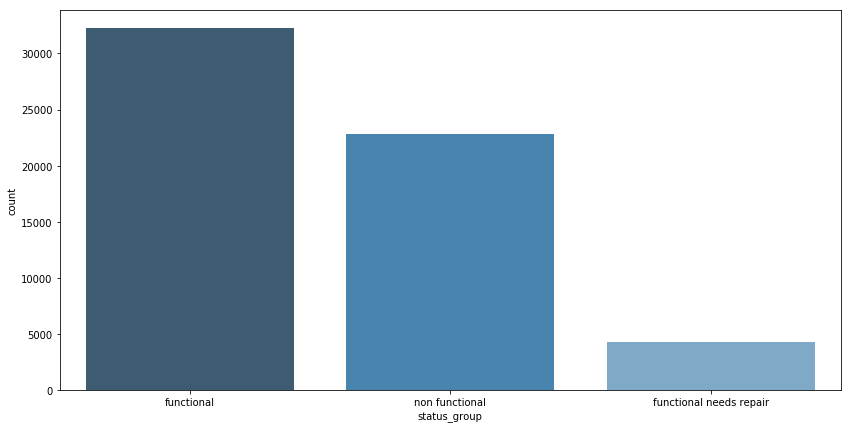

In [131]:
# to find out the count for the categories:
plt.figure(figsize=(14,7))
sns.countplot(x='status_group',data=tr, palette="Blues_d")
#tr.status_group.value_counts(normalize=True).plot(kind='bar')
#x = tr['status_group'].value_counts(dropna=False)
#x.plot(kind="bar", figsize=(8,8))

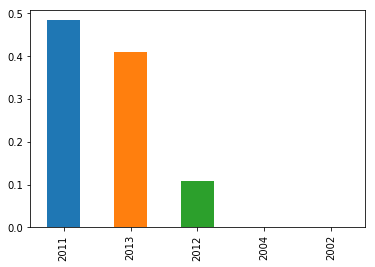

In [133]:
# TIME ANALYSIS
#not a time series, readings are sporadic, there are gaps in years
tr['date_recorded']=pd.to_datetime(tr.date_recorded)
tr['year']=tr.date_recorded.dt.year

#2004 and 2002 datapoints; <1% of the dataset combined
tr.year.value_counts(normalize=True).plot(kind='bar')

Text(0,0.5,'Pump Health Prevalence %')

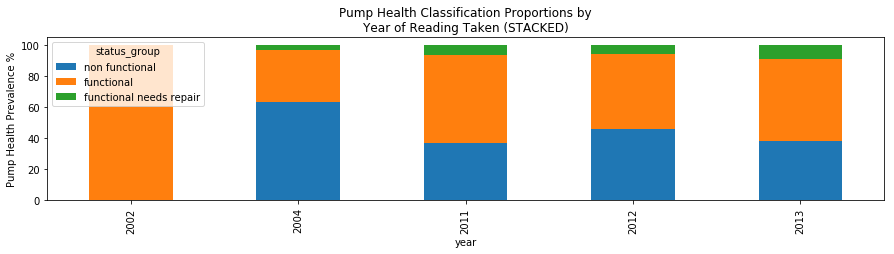

In [135]:
# Checking out outcome variable proportion by year reading taken:

temp=pd.crosstab(tr.status_group, tr.year).apply(lambda col: ((col/col.sum()).round(3))*100, axis=0)
temp=temp.reindex(['non functional','functional','functional needs repair'])
temp.transpose().plot(kind='bar',legend='status_group',stacked=True,figsize=(15,3), 
                      title='Pump Health Classification Proportions by\nYear of Reading Taken (STACKED)')
plt.ylabel( 'Pump Health Prevalence %')

#we see that 2002 is misleading in its classification distribution (Only 1 data point in 2002). 

In [134]:
# Change the column to represent the number of days since the most recently recorded datum we have. 
#Reason is: more recent recorded pumps
# might be likely be functional than non-functional or needed repair. 
# Latest record is 2013-12-03. Subtract each date record from this date to get:
# 'days_since_recorded' column.

tr.date_recorded = pd.datetime(2013, 12, 3) - pd.to_datetime(tr.date_recorded)
tr.columns = ['days_since_recorded' if x=='date_recorded' else x for x in tr.columns]
tr.days_since_recorded = tr.days_since_recorded.astype('timedelta64[D]').astype(int)
tr.days_since_recorded.describe()

count    59400.000000
mean       613.616970
std        334.216374
min          0.000000
25%        297.000000
50%        419.000000
75%        977.000000
max       4068.000000
Name: days_since_recorded, dtype: float64

In [136]:
# Checking out Pump health proportion by construction years:
temp1=pd.crosstab(tr.status_group, tr.construction_year).apply(lambda col: ((col/col.sum()).round(3))*100, axis=0)
temp1=temp1.reindex(['non functional','functional','functional needs repair'])
temp1

construction_year,0,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
status_group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
non functional,40.4,70.6,76.2,73.3,56.5,80.0,36.8,64.7,45.5,66.2,69.5,72.3,39.3,65.3,65.8,59.6,57.7,66.9,64.4,49.6,72.4,60.8,59.7,61.0,57.4,...,43.4,45.0,51.2,37.2,47.5,42.7,34.1,46.5,44.4,34.9,24.3,32.3,31.9,30.2,30.1,31.1,34.0,30.8,24.6,24.8,24.5,20.1,18.7,28.3,41.5
functional,51.0,23.5,9.5,23.3,36.5,17.5,57.9,35.3,35.2,28.6,25.4,24.1,56.6,25.1,29.9,34.6,33.0,20.5,30.7,41.1,21.4,31.8,35.7,31.7,38.3,...,52.2,48.8,43.5,56.4,46.9,51.5,58.5,47.6,45.2,56.1,70.9,61.2,61.3,64.4,64.4,62.7,57.2,60.0,68.1,70.4,70.0,76.5,75.1,67.0,58.0
functional needs repair,8.6,5.9,14.3,3.3,7.1,2.5,5.3,0.0,19.3,5.2,5.1,3.6,4.1,9.6,4.3,5.8,9.4,12.6,5.0,9.4,6.2,7.4,4.6,7.3,4.3,...,4.4,6.2,5.2,6.4,5.6,5.8,7.4,5.9,10.4,9.0,4.8,6.5,6.9,5.4,5.5,6.2,8.8,9.2,7.3,4.9,5.4,3.4,6.2,4.7,0.6


Text(0,0.5,'Pump Health Prevalence %')

Text(0.5,1,'Pump Health Proportions by Construction Year (STACKED)\n(0 == unknown construction year)')

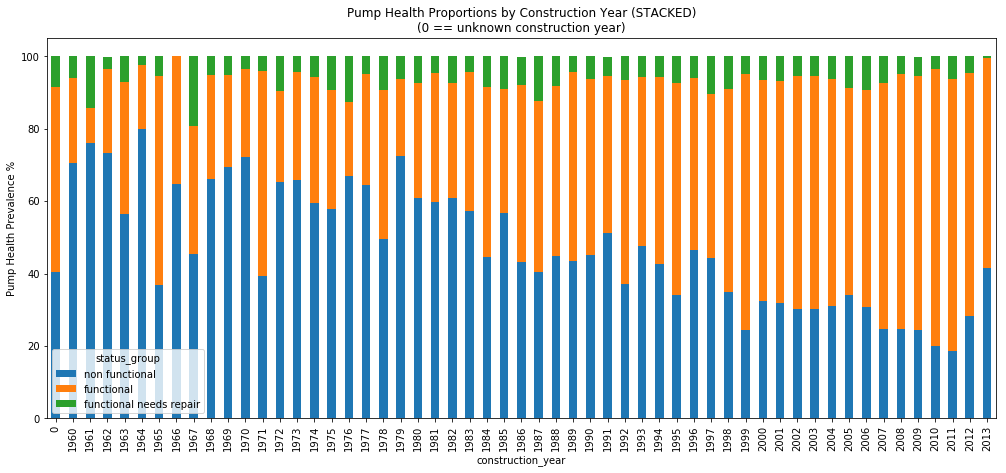

In [137]:
fig, ax = plt.subplots(1,1,figsize=(17,7))
temp1.transpose().plot(kind='bar', legend='status_group', stacked=True, ax=ax)
ax.set_ylabel('Pump Health Prevalence %')
ax.set_title('Pump Health Proportions by Construction Year (STACKED)\n(0 == unknown construction year)')

In [76]:
#what % of "construction years" are missing?
round((len(tr[tr.construction_year==0])/float(len(tr)))*100, 2)

34.86

<Figure size 1008x504 with 0 Axes>

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


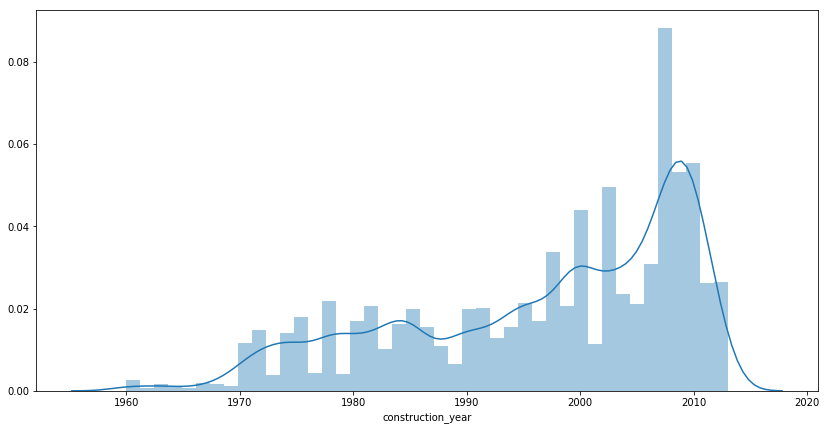

In [77]:
plt.figure(figsize=(14,7))
sns.distplot(tr['construction_year'][tr['construction_year']>0])

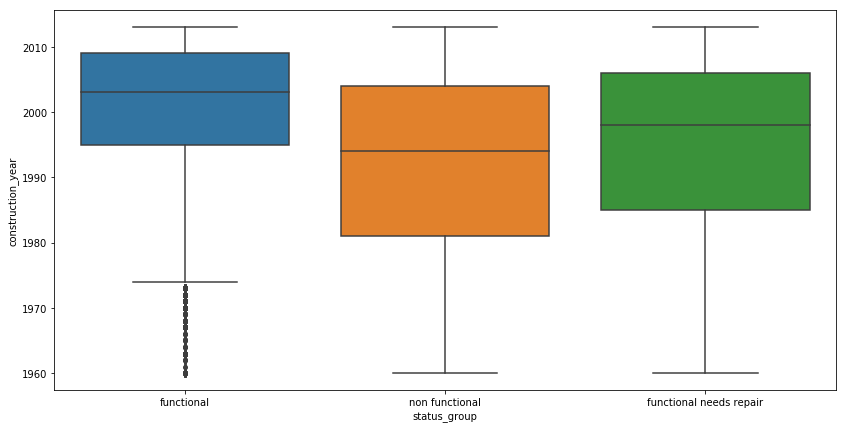

In [78]:
plt.figure(figsize=(14,7))
sns.boxplot(x='status_group', y="construction_year", data=tr[tr['construction_year']>0]);

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


<function matplotlib.pyplot.legend(*args, **kwargs)>

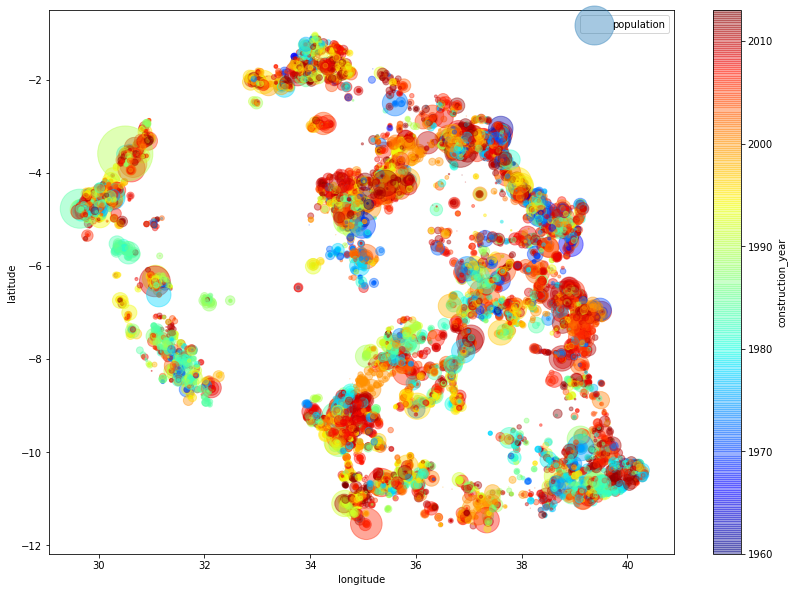

In [79]:
# We need to filter the instances with year 0, longitud 0 and latitude 0 in this case
tr[tr['longitude']>0][tr['latitude']<0][tr['construction_year']>0].plot\
    (kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=tr["population"]/10, label="population", figsize=(14,10),
    c="construction_year", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend

<Figure size 1008x936 with 0 Axes>

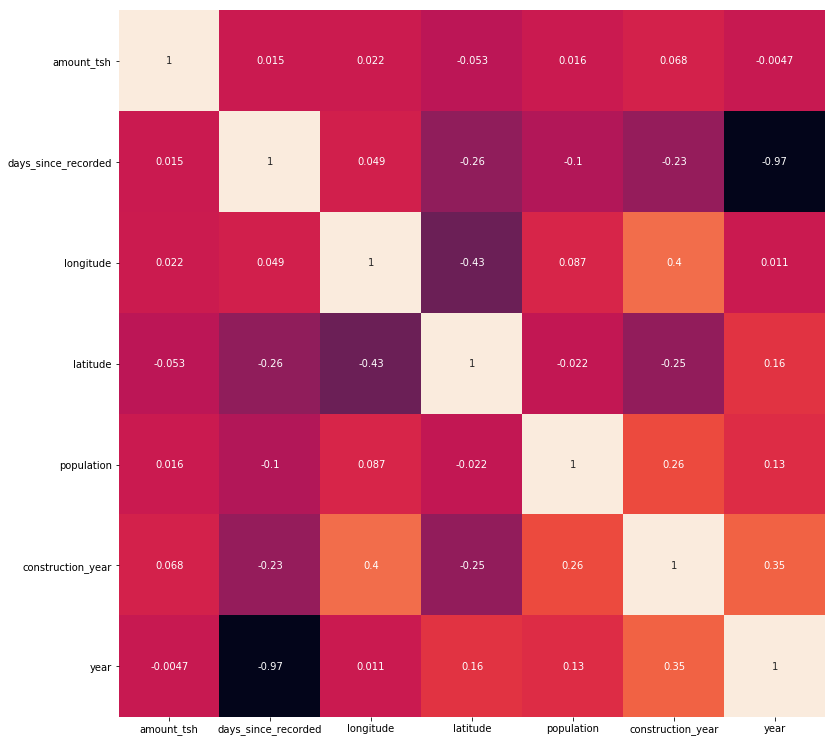

In [80]:
cor = tr.corr()
plt.figure(figsize=(14,13))
sns.heatmap(cor, square=True, annot=True, cbar=False)

In [138]:
# Convert construction_year into a categorical column containing the following values: '60s', '70s',
# '80s', '90s, '00s', '10s', 'unknown'.

def construction(row):
    if row['construction_year'] >= 1960 and row['construction_year'] < 1970:
        return '60s'
    elif row['construction_year'] >= 1970 and row['construction_year'] < 1980:
        return '70s'
    elif row['construction_year'] >= 1980 and row['construction_year'] < 1990:
        return '80s'
    elif row['construction_year'] >= 1990 and row['construction_year'] < 2000:
        return '90s'
    elif row['construction_year'] >= 2000 and row['construction_year'] < 2010:
        return '00s'
    elif row['construction_year'] >= 2010:
        return '10s'
    else:
        return 'unknown'
    
tr['construction_year'] = tr.apply(lambda row: construction(row), axis=1)

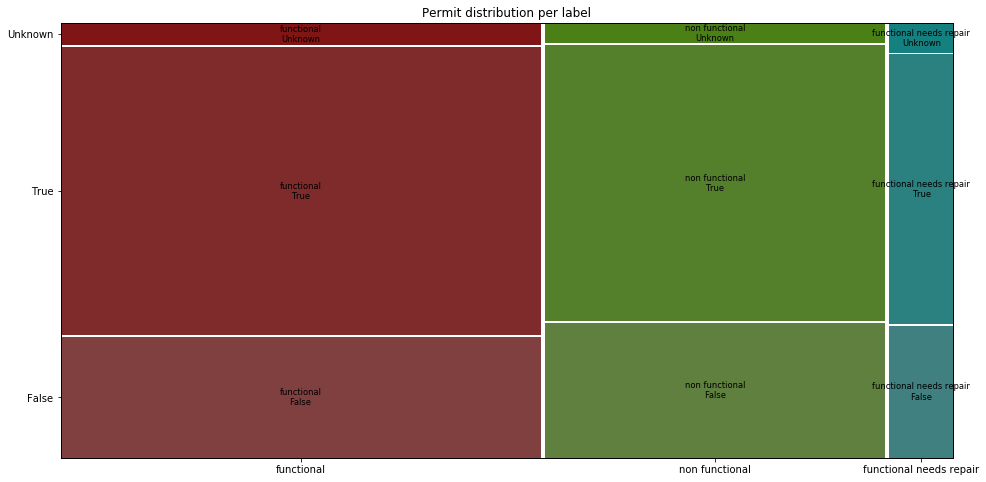

In [82]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))
fig = mosaic(tr, ['status_group', 'permit'], axes, title="Permit distribution per label")

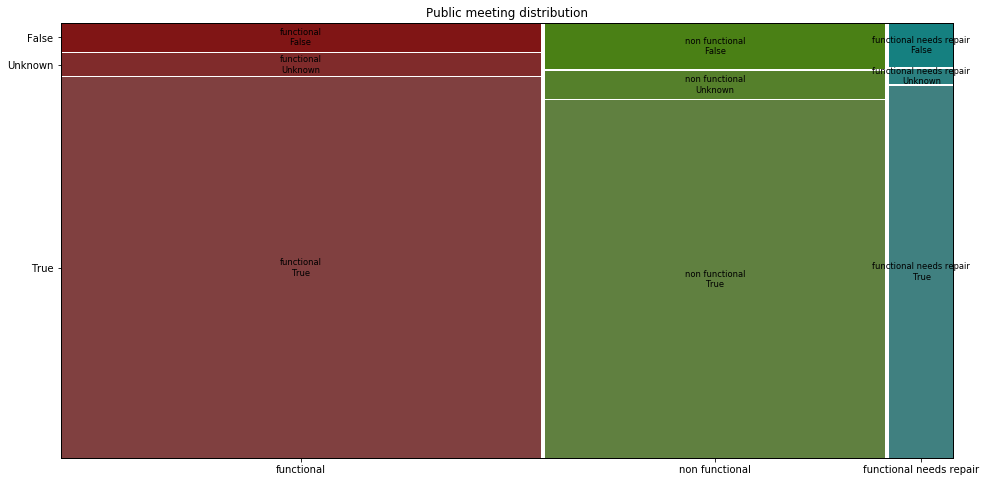

In [83]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))
fig = mosaic(tr, ['status_group', 'public_meeting'], axes, title="Public meeting distribution")

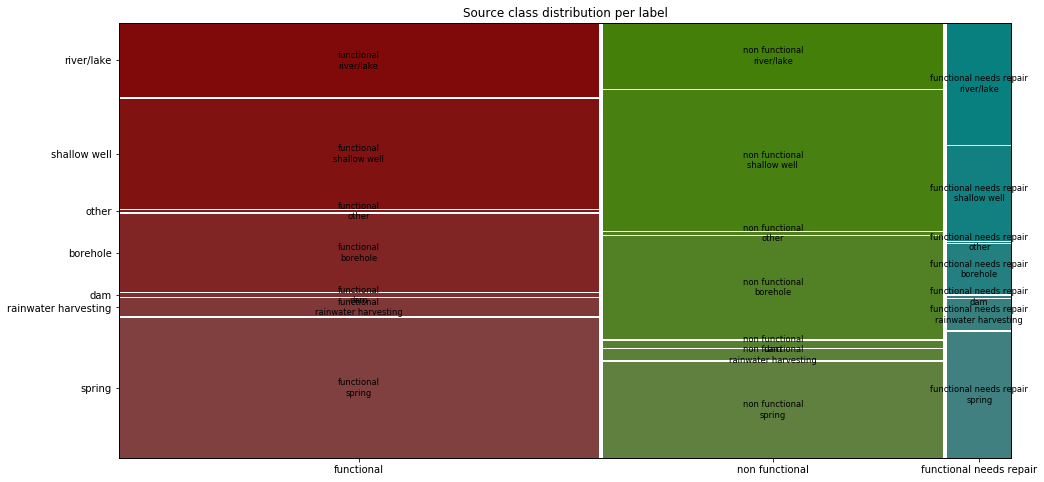

In [86]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))
fig = mosaic(tr, ['status_group', 'source_type'], axes, title="Source class distribution per label")

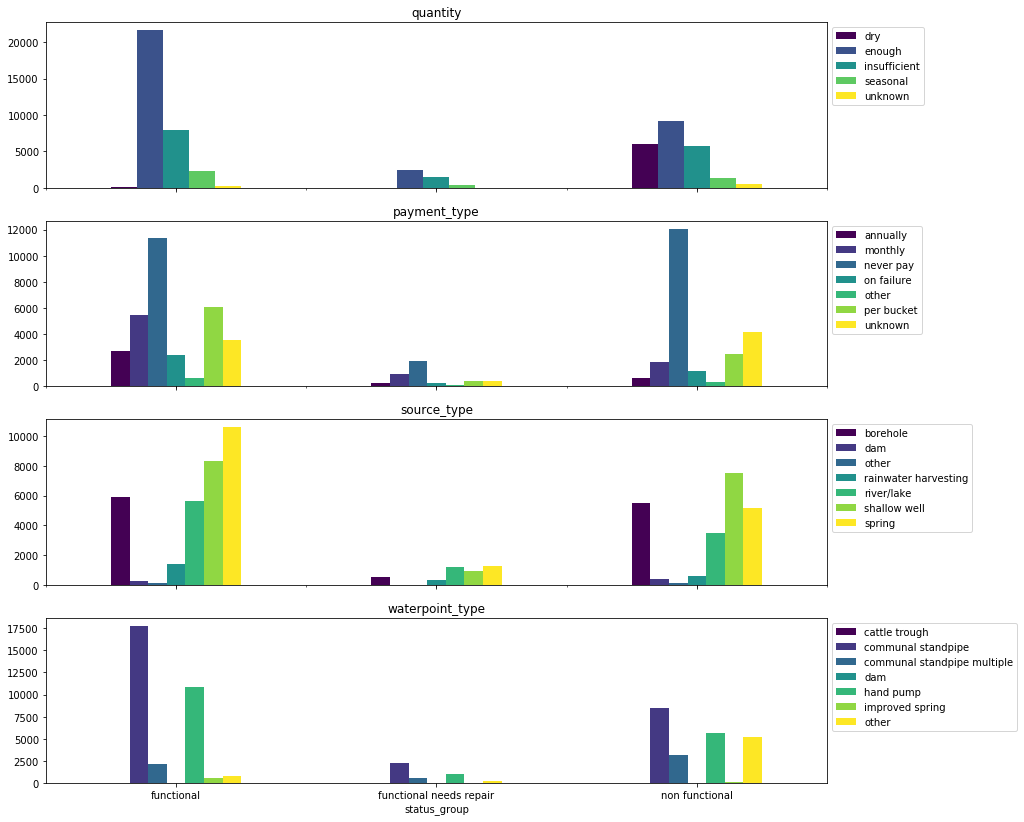

In [139]:
variables = ['quantity','payment_type','source_type','waterpoint_type']
label = 'status_group'

def plot_tables(tr,label,variables):
    fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize = (14,14))
    for i,variable in enumerate(variables):
        ax = pd.pivot_table(tr[[label,variable]], index = [label,variable], aggfunc = len)\
        .unstack(variable).plot(kind='bar', ax=axes[i], sharex=True, title=variable, rot=0, colormap='viridis')
        ax.legend(bbox_to_anchor=(1,1),loc="upper left")
        
plot_tables(tr,label,variables)

<Figure size 1008x720 with 0 Axes>

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


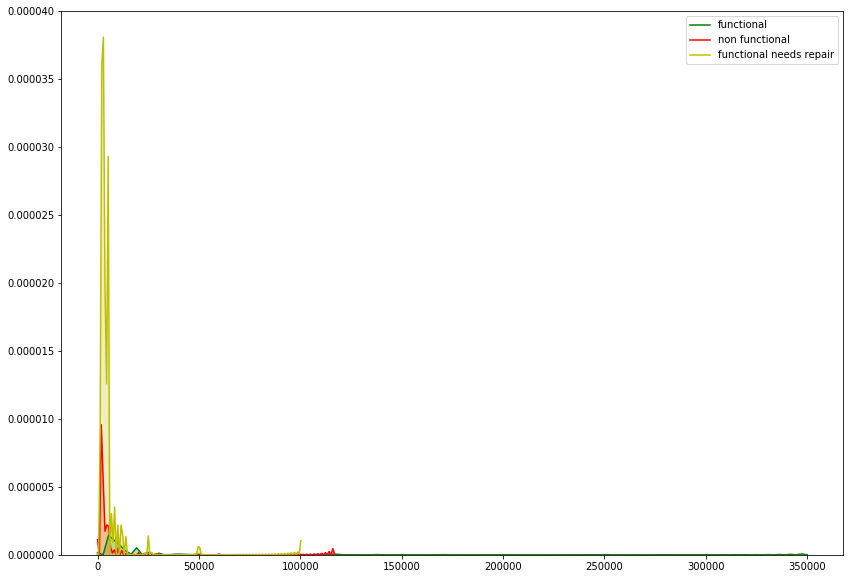

In [154]:
plt.figure(figsize=(14,10))

p1=sns.kdeplot(tr[['amount_tsh','status_group']][tr.status_group == 'functional']\
               [tr.days_since_recorded > 0].amount_tsh, shade=True, color="g",label='functional')
p1=sns.kdeplot(tr[['amount_tsh','status_group']][tr.status_group == 'non functional']\
               [tr.days_since_recorded > 0].amount_tsh, shade=True, color="r",label='non functional')
p1=sns.kdeplot(tr[['amount_tsh','status_group']][tr.status_group == 'functional needs repair']\
               [tr.amount_tsh > 0].amount_tsh, shade=True, color="y",label='functional needs repair')

<Figure size 1008x504 with 0 Axes>

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


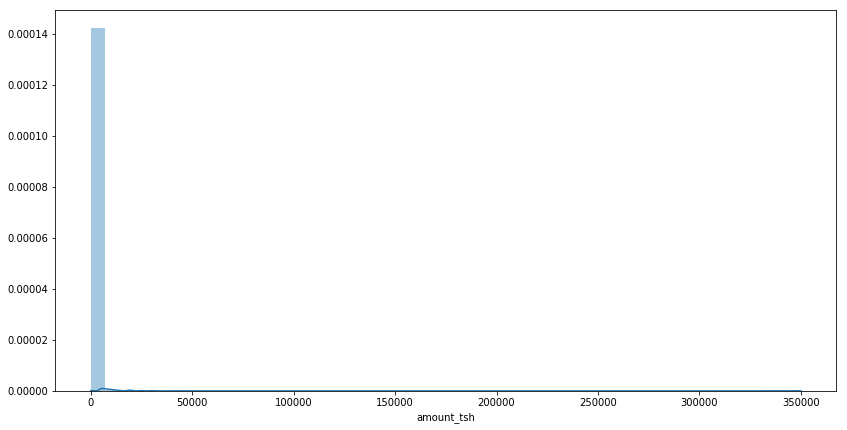

In [156]:
plt.figure(figsize=(14,7))
sns.distplot(tr['amount_tsh'])

<Figure size 1440x720 with 0 Axes>

[27, 43, -12, 0]

<Figure size 1440x720 with 0 Axes>

[27, 43, -12, 0]

<Figure size 1440x720 with 0 Axes>

[27, 43, -12, 0]

<Figure size 1440x720 with 0 Axes>

[27, 43, -12, 0]

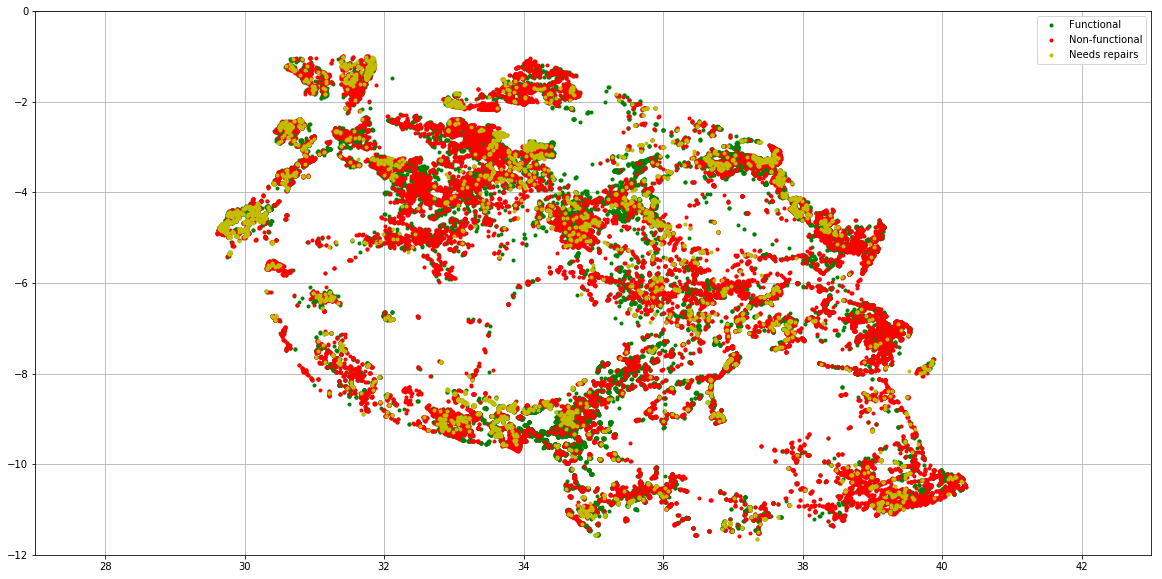

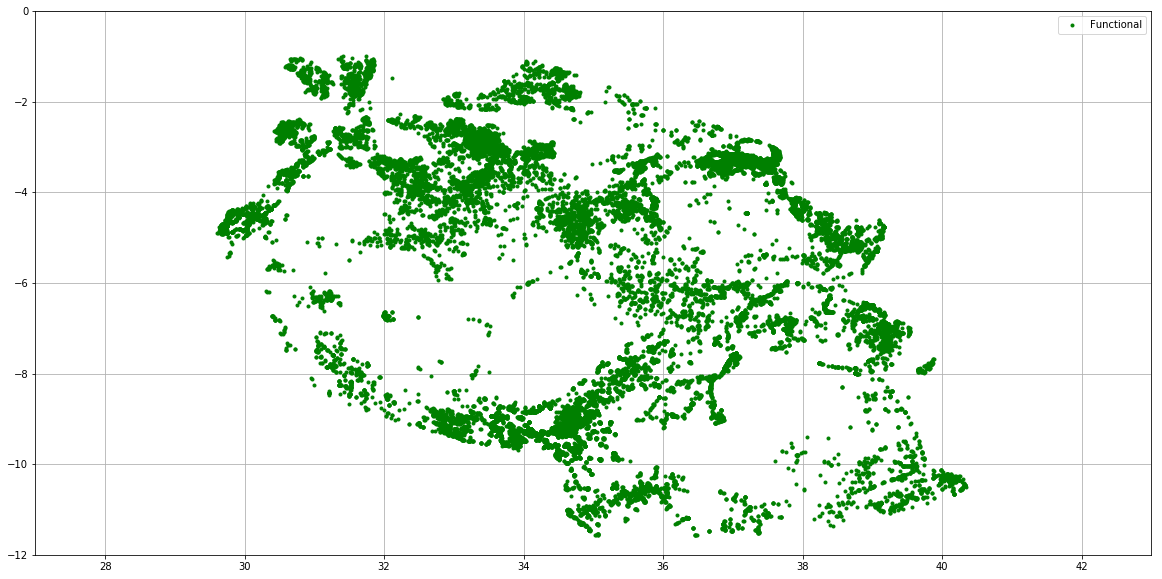

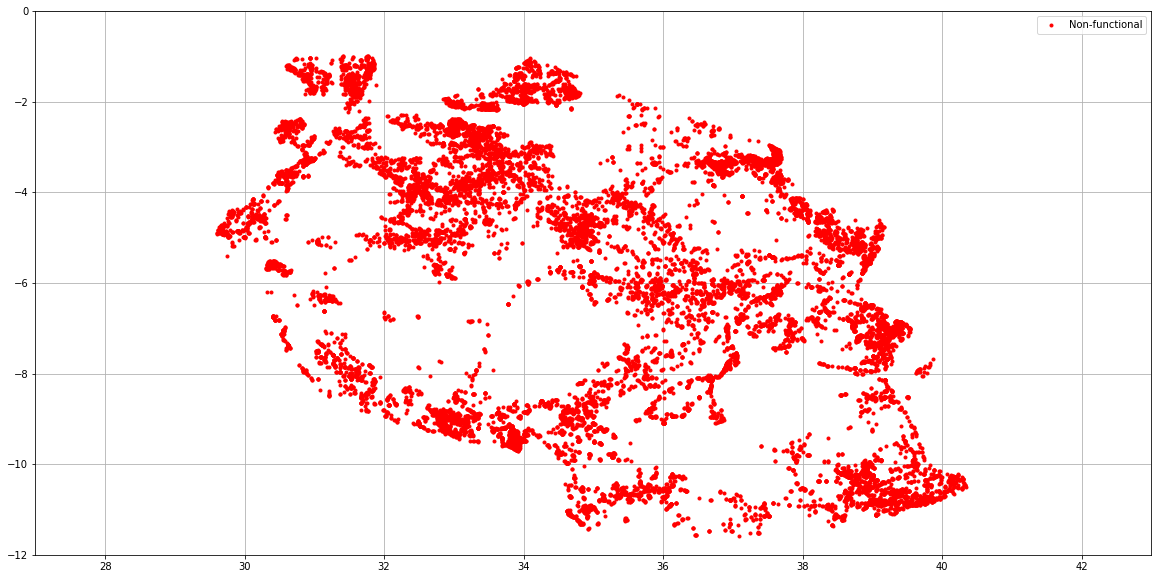

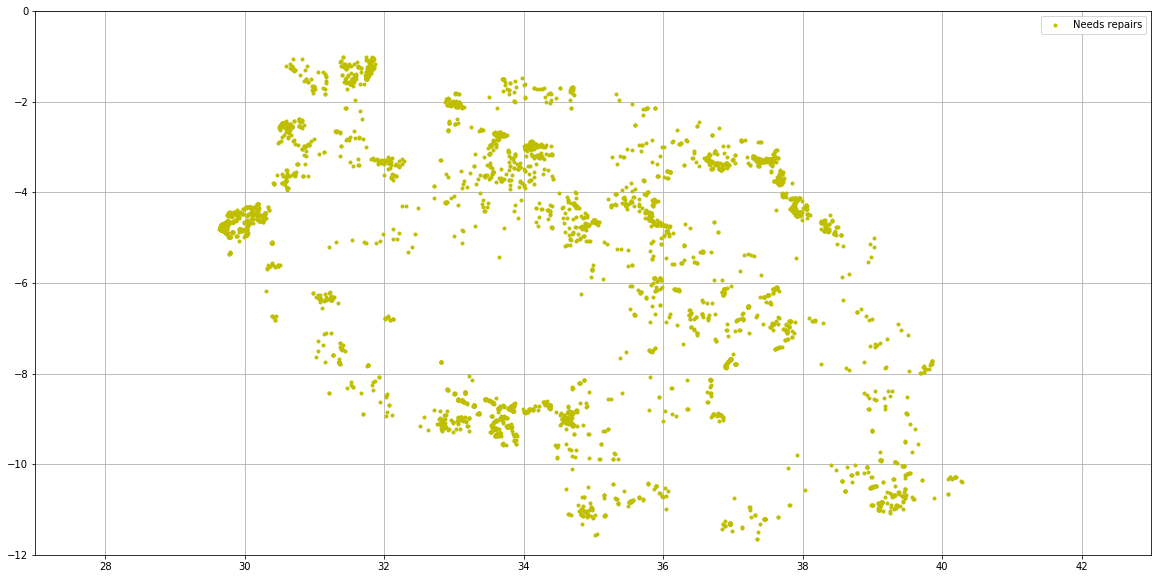

In [140]:
# separate data by status of pump
func_tr = tr[tr['status_group']=='functional']
nonfunc_tr = tr[tr['status_group']=='non functional']
repair_tr = tr[tr['status_group']=='functional needs repair']

# plot pump status on coordinate grid
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,10));
plt.plot(func_tr.longitude,func_tr.latitude,'g.');
plt.plot(nonfunc_tr.longitude,nonfunc_tr.latitude,'r.');
plt.plot(repair_tr.longitude,repair_tr.latitude,'y.');
plt.legend(['Functional','Non-functional','Needs repairs']);
plt.axis([27,43,-12,0]);
plt.grid(True);

plt.figure(figsize=(20,10));
plt.plot(func_tr.longitude,func_tr.latitude,'g.');
plt.legend(['Functional']);
plt.axis([27,43,-12,0]);
plt.grid(True);

plt.figure(figsize=(20,10));
plt.plot(nonfunc_tr.longitude,nonfunc_tr.latitude,'r.');
plt.legend(['Non-functional']);
plt.axis([27,43,-12,0]);
plt.grid(True);

plt.figure(figsize=(20,10));
plt.plot(repair_tr.longitude,repair_tr.latitude,'y.');
plt.legend(['Needs repairs']);
plt.axis([27,43,-12,0]);
plt.grid(True);

In [141]:
# Transform population & amount_tsh

def transform_data(data):
    # Transformation of variables if required or for testing
    tr['amount_tsh'] = tr.amount_tsh.apply(lambda x: np.log(x+1))
    tr['population'] = tr.population.apply(lambda x: np.log(x+1))
    return data

## Review the data

In [142]:
tr.head(3)
tr.tail(3)
tr.shape

,amount_tsh,days_since_recorded,funder,installer,longitude,latitude,basin,region,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,waterpoint_type,status_group,year
0,6000.0,995,other,other,34.938093,-9.856322,Lake Nyasa,Iringa,109,True,VWC,False,90s,gravity,user-group,annually,good,enough,spring,communal standpipe,functional,2011
1,0.0,272,other,other,34.698766,-2.147466,Lake Victoria,Mara,280,Unknown,Other,True,10s,gravity,user-group,never pay,good,insufficient,rainwater harvesting,communal standpipe,functional,2013
2,25.0,281,other,other,37.460664,-3.821329,Pangani,Manyara,250,True,VWC,True,00s,gravity,user-group,per bucket,good,enough,dam,communal standpipe multiple,functional,2013


,amount_tsh,days_since_recorded,funder,installer,longitude,latitude,basin,region,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,waterpoint_type,status_group,year
59397,0.0,967,other,other,34.017087,-8.750434,Rufiji,Mbeya,0,True,VWC,False,unknown,handpump,user-group,monthly,fluoride,enough,borehole,hand pump,functional,2011
59398,0.0,1001,other,other,35.861315,-6.378573,Rufiji,Dodoma,0,True,VWC,True,unknown,handpump,user-group,never pay,good,insufficient,shallow well,hand pump,functional,2011
59399,0.0,986,world_bank,other,38.104048,-6.747464,Wami / Ruvu,Morogoro,150,True,VWC,True,00s,handpump,user-group,on failure,salty,enough,shallow well,hand pump,functional,2011


(59400, 22)

In [143]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 22 columns):
amount_tsh               59400 non-null float64
days_since_recorded      59400 non-null int32
funder                   59400 non-null object
installer                59400 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
basin                    59400 non-null object
region                   59400 non-null object
population               59400 non-null int64
public_meeting           59400 non-null object
scheme_management        59400 non-null object
permit                   59400 non-null object
construction_year        59400 non-null object
extraction_type_class    59400 non-null object
management_group         59400 non-null object
payment_type             59400 non-null object
quality_group            59400 non-null object
quantity                 59400 non-null object
source_type              59400 non-null obje

In [144]:
 tr.apply(lambda x: sum(x.isnull()),axis=0) 

amount_tsh               0
days_since_recorded      0
funder                   0
installer                0
longitude                0
latitude                 0
basin                    0
region                   0
population               0
public_meeting           0
scheme_management        0
permit                   0
construction_year        0
extraction_type_class    0
management_group         0
payment_type             0
quality_group            0
quantity                 0
source_type              0
waterpoint_type          0
status_group             0
year                     0
dtype: int64

In [145]:
print(tr.describe())

          amount_tsh  days_since_recorded     longitude      latitude  \
count   59400.000000         59400.000000  59400.000000  5.940000e+04   
mean      317.650385           613.616970     34.077427 -5.706033e+00   
std      2997.574558           334.216374      6.567432  2.946019e+00   
min         0.000000             0.000000      0.000000 -1.164944e+01   
25%         0.000000           297.000000     33.090347 -8.540621e+00   
50%         0.000000           419.000000     34.908743 -5.021597e+00   
75%        20.000000           977.000000     37.178387 -3.326156e+00   
max    350000.000000          4068.000000     40.345193 -2.000000e-08   

         population          year  
count  59400.000000  59400.000000  
mean     179.909983   2011.921667  
std      471.482176      0.958758  
min        0.000000   2002.000000  
25%        0.000000   2011.000000  
50%       25.000000   2012.000000  
75%      215.000000   2013.000000  
max    30500.000000   2013.000000  


In [101]:
# Top 5 regions ranked by total number of functional status group

fun = tr.loc[tr['status_group']=='functional'].groupby('region')
fun2 = fun['status_group'].value_counts().sort_values(ascending = False).head()
fun2

region       status_group
Iringa       functional      4141
Shinyanga    functional      2789
Kilimanjaro  functional      2640
Mbeya        functional      2319
Arusha       functional      2294
Name: status_group, dtype: int64

In [102]:
# Top 5 regions ranked by total number of non functional status group

non_fun = tr.loc[tr['status_group']=='non functional'].groupby('region')
non_fun2=non_fun['status_group'].value_counts().sort_values(ascending = False).head()
non_fun2

region       status_group  
Mbeya        non functional    1816
Morogoro     non functional    1587
Shinyanga    non functional    1558
Kilimanjaro  non functional    1417
Mwanza       non functional    1417
Name: status_group, dtype: int64

In [103]:
# Top 5 regions ranked by total number of need repair status group

rep = tr.loc[tr['status_group']=='functional needs repair'].groupby('region')
rep2= rep['status_group'].value_counts().sort_values(ascending = False).head()
rep2

region       status_group           
Shinyanga    functional needs repair    635
Kigoma       functional needs repair    603
Mbeya        functional needs repair    504
Kilimanjaro  functional needs repair    322
Kagera       functional needs repair    304
Name: status_group, dtype: int64

status_group,functional,functional needs repair,non functional
payment_type,,,
annually,2740,247,655
monthly,5482,927,1891
never pay,11379,1907,12062
on failure,2429,277,1208
other,611,118,325
per bucket,6090,409,2486
unknown,3528,432,4197


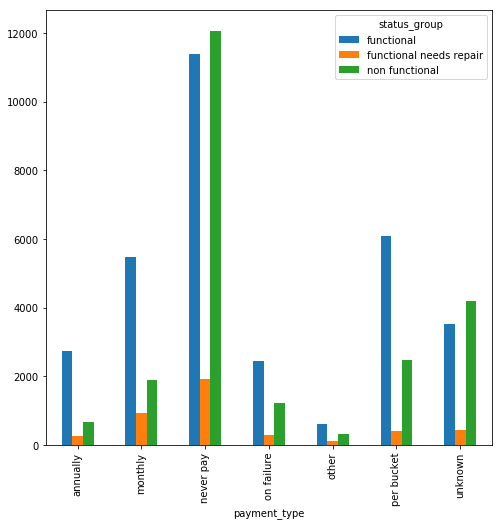

In [146]:
# Status_group vs payment_type

status_payment_table = pd.crosstab(index=tr["payment_type"], 
                          columns=tr["status_group"])

status_payment_table

status_payment_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=False)

status_group,functional,functional needs repair,non functional
quality_group,,,
colored,246,54,190
fluoride,157,13,47
good,28760,3904,18154
milky,438,14,352
salty,2394,297,2504
unknown,264,35,1577


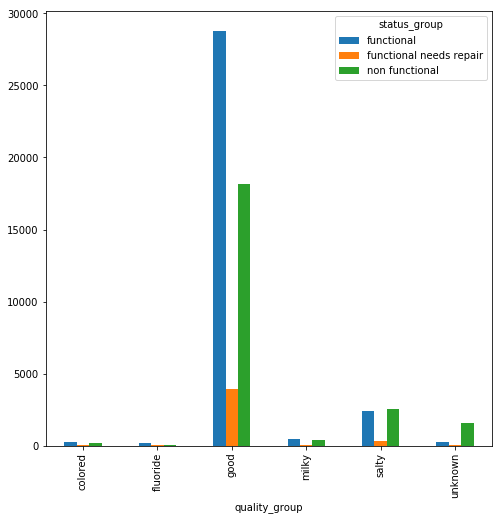

In [147]:
# Status_group vs quality_group

status_quality_table = pd.crosstab(index=tr["quality_group"], 
                          columns=tr["status_group"])

status_quality_table

status_quality_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=False)

status_group,functional,functional needs repair,non functional
waterpoint_type,,,
cattle trough,84,2,30
communal standpipe,17726,2260,8536
communal standpipe multiple,2235,648,3220
dam,6,0,1
hand pump,10805,1029,5654
improved spring,563,85,136
other,840,293,5247


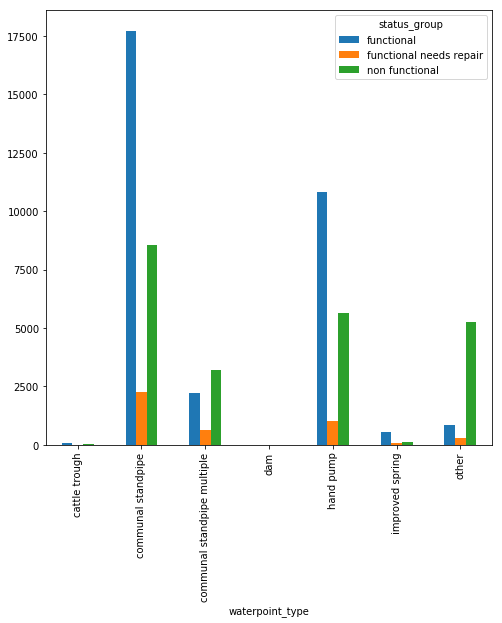

In [148]:
# Status_group vs water point

status_waterpoint_table = pd.crosstab(index=tr["waterpoint_type"], 
                          columns=tr["status_group"])

status_waterpoint_table

status_waterpoint_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=False)

status_group,functional,functional needs repair,non functional
quantity,,,
dry,157,37,6052
enough,21648,2400,9138
insufficient,7916,1450,5763
seasonal,2325,416,1309
unknown,213,14,562


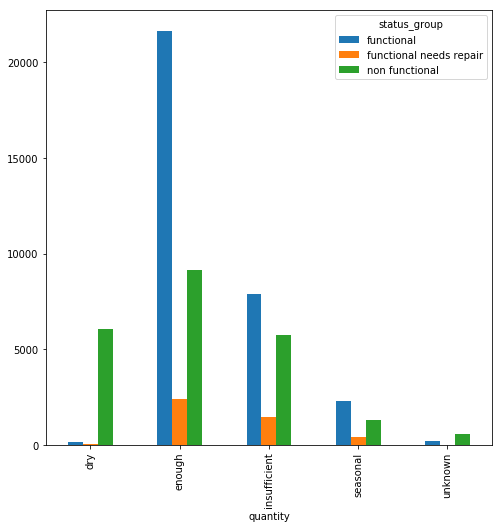

In [149]:
# Status_group vs quantity

status_quantity_table = pd.crosstab(index=tr["quantity"], 
                          columns=tr["status_group"])

status_quantity_table

status_quantity_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=False)

status_group,functional,functional needs repair,non functional
construction_year,,,
00s,9989,977,4364
10s,3794,220,1147
60s,156,42,340
70s,1406,348,2652
80s,2220,423,2935
90s,4139,518,3021
unknown,10555,1789,8365


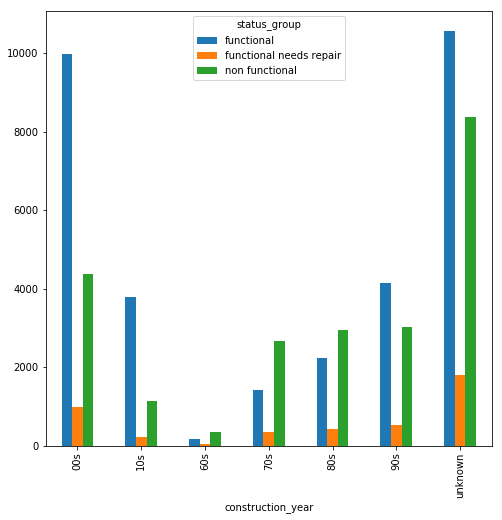

In [150]:
# Status_group vs construction_year

status_construction_table = pd.crosstab(index=tr["construction_year"], 
                          columns=tr["status_group"])

status_construction_table

status_construction_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=False)

status_group,functional,functional needs repair,non functional
days_since_recorded,,,
0,196,8,36
1,10,0,23
2,1,0,0
30,129,15,50
31,16,0,8
61,106,2,30
62,33,2,20
91,167,0,42
92,8,1,23


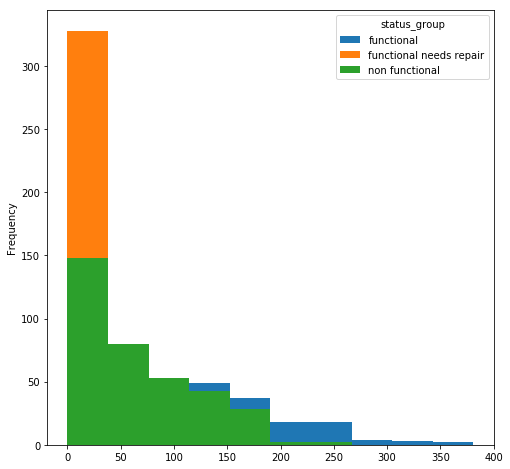

In [151]:
# Status_group vs days_since_recorded

status_recorded_table = pd.crosstab(index=tr["days_since_recorded"], 
                          columns=tr["status_group"])

status_recorded_table

status_recorded_table.plot(kind="hist", 
                 figsize=(8,8))

## Save the dataset

In [110]:
tr.to_csv('train.csv', index=False)